# Step1.准备工作

In [7]:
# 下载包
!pip install seaborn
!pip install missingno

In [10]:
# 导入包

import warnings
warnings.filterwarnings('ignore')
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [11]:
# 传入数据集

Train_data = pd.read_csv("./used_car_train_20200313.csv", sep = ' ')
Test_data = pd.read_csv("./used_car_testB_20200421.csv", sep = ' ')
#指定sep为空格，才能够正确读入数据

In [12]:
# 查看数据集规模

print("训练集数据规模:", Train_data.shape)
print("测试集数据规模:", Test_data.shape)

训练集数据规模: (150000, 31)
测试集数据规模: (50000, 30)


**可以看到，训练集有15w条数据，31个属性。测试集有5w条数据，30个属性，少的那一个属性就是我们要预测的价格：price**

In [13]:
# 浏览数据形式

Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】

In [14]:
# 查看info

Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

- **model、bodyType、fuelType和gearbox的有效值（Non-Null Count）小于15w，说明有部分数据在这些属性上存在缺失值。**

- **只有notRepairedDamage这个属性的Dtype是object，我们重点查看一下**

In [15]:
# 查看notRepairedDamage

Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

**存在24324个数据的取值为“-”。猜测“-”可能代表车辆未记录有无不可修复的损伤或者无法判断，值得注意的是这24324个数据是存在取值的，并不是缺失值。但“-”不好进行数据处理，所以我们决定把它变为nan。**


# Step2.数据处理

## 2.1处理缺失值


In [16]:
# 把notRepairedDamage的“-”取值替换为缺失值

Train_data['notRepairedDamage'].replace("-", np.nan, inplace = True)
Test_data['notRepairedDamage'].replace("-", np.nan, inplace = True)

Train_data['notRepairedDamage'].value_counts()
#替换成功。

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [17]:
# 查看缺失值

Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

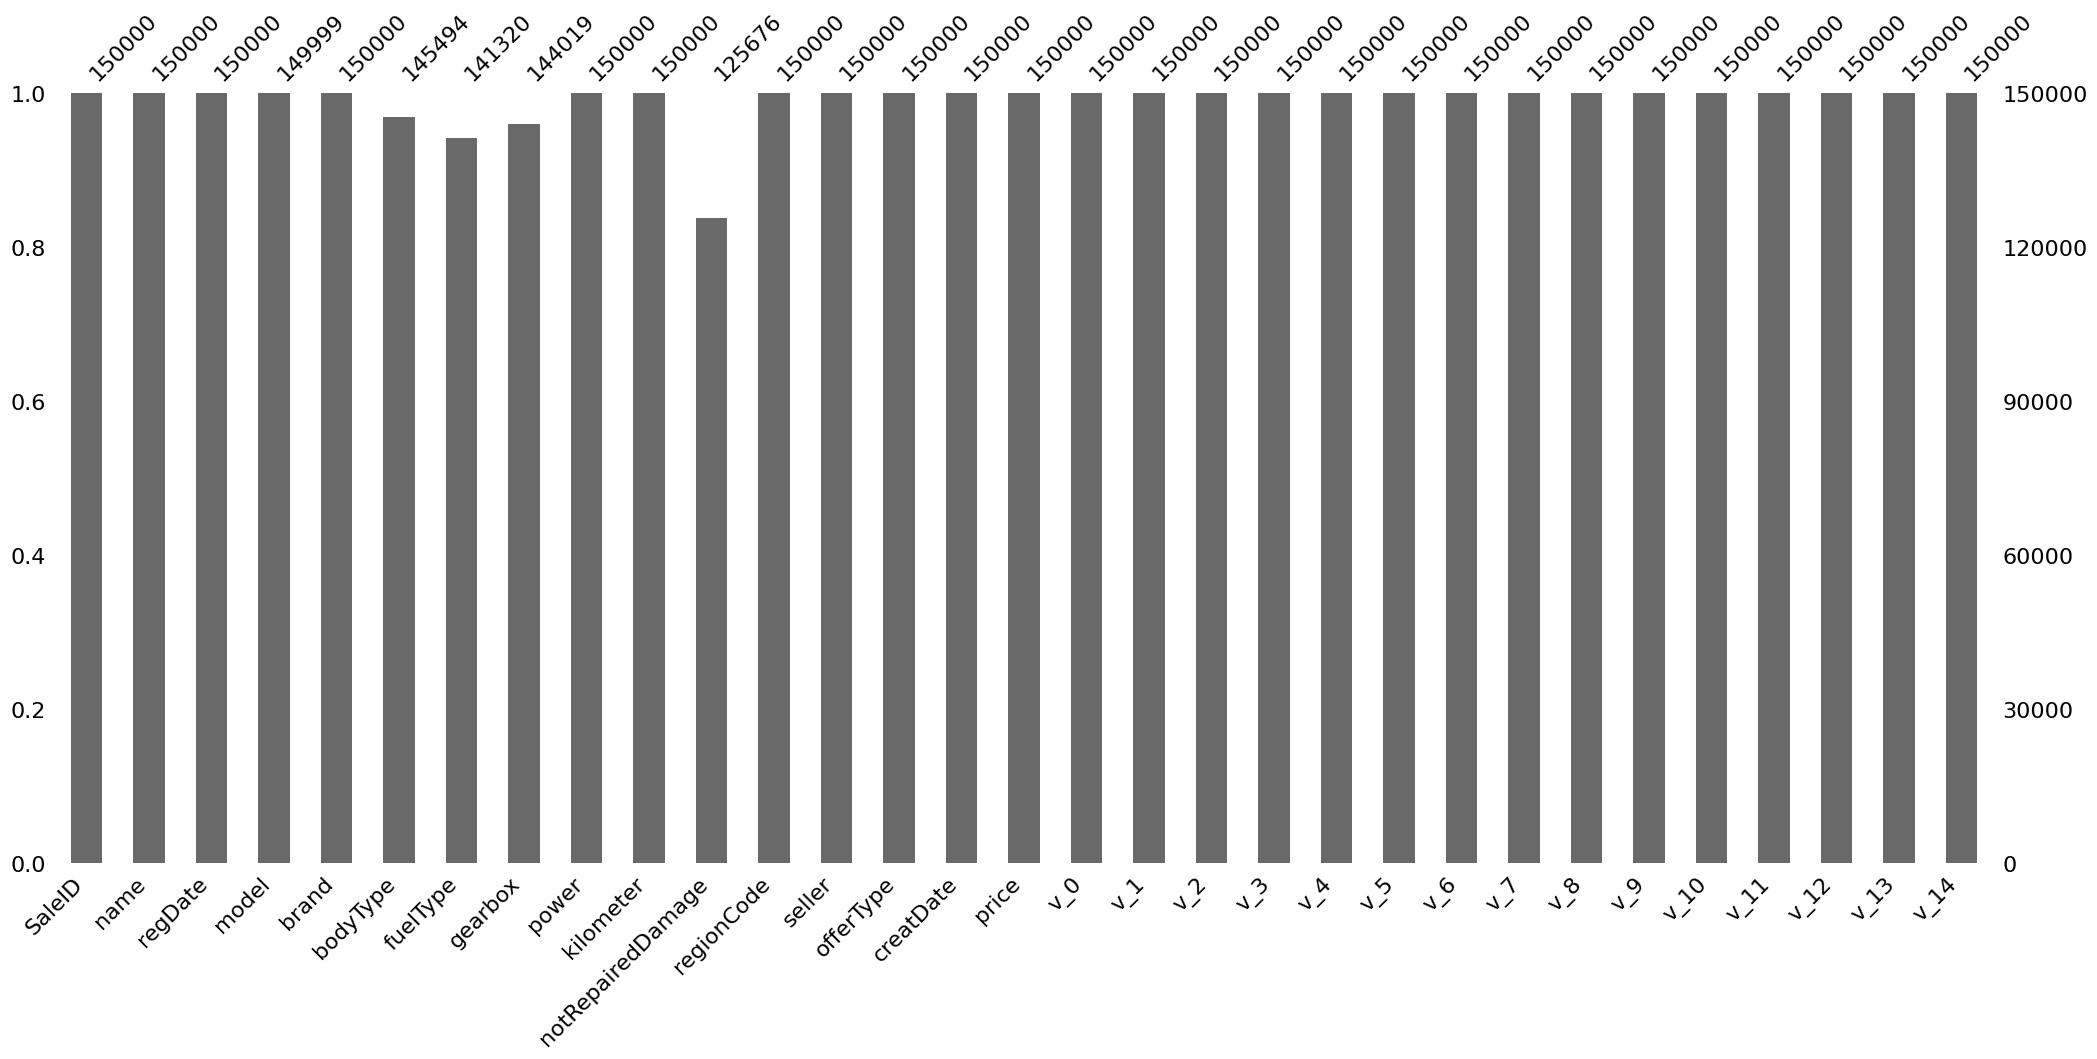

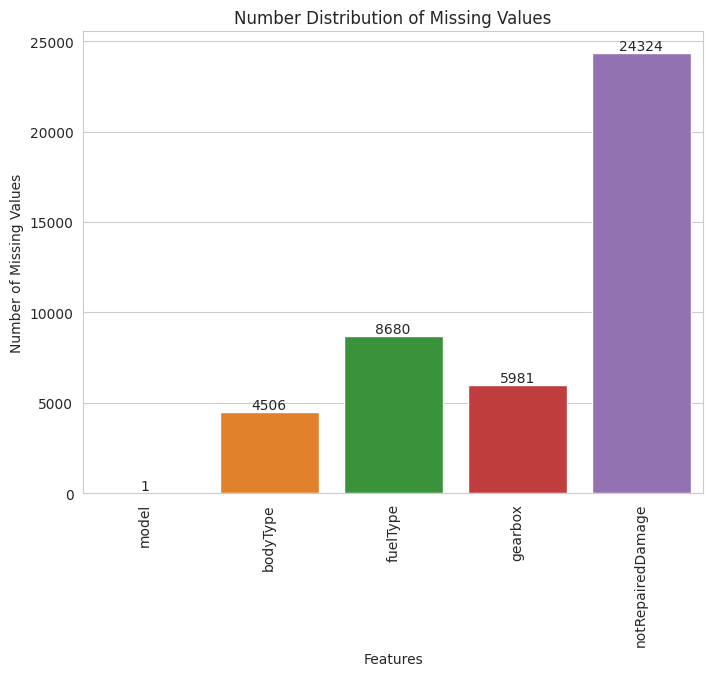

<AxesSubplot:>

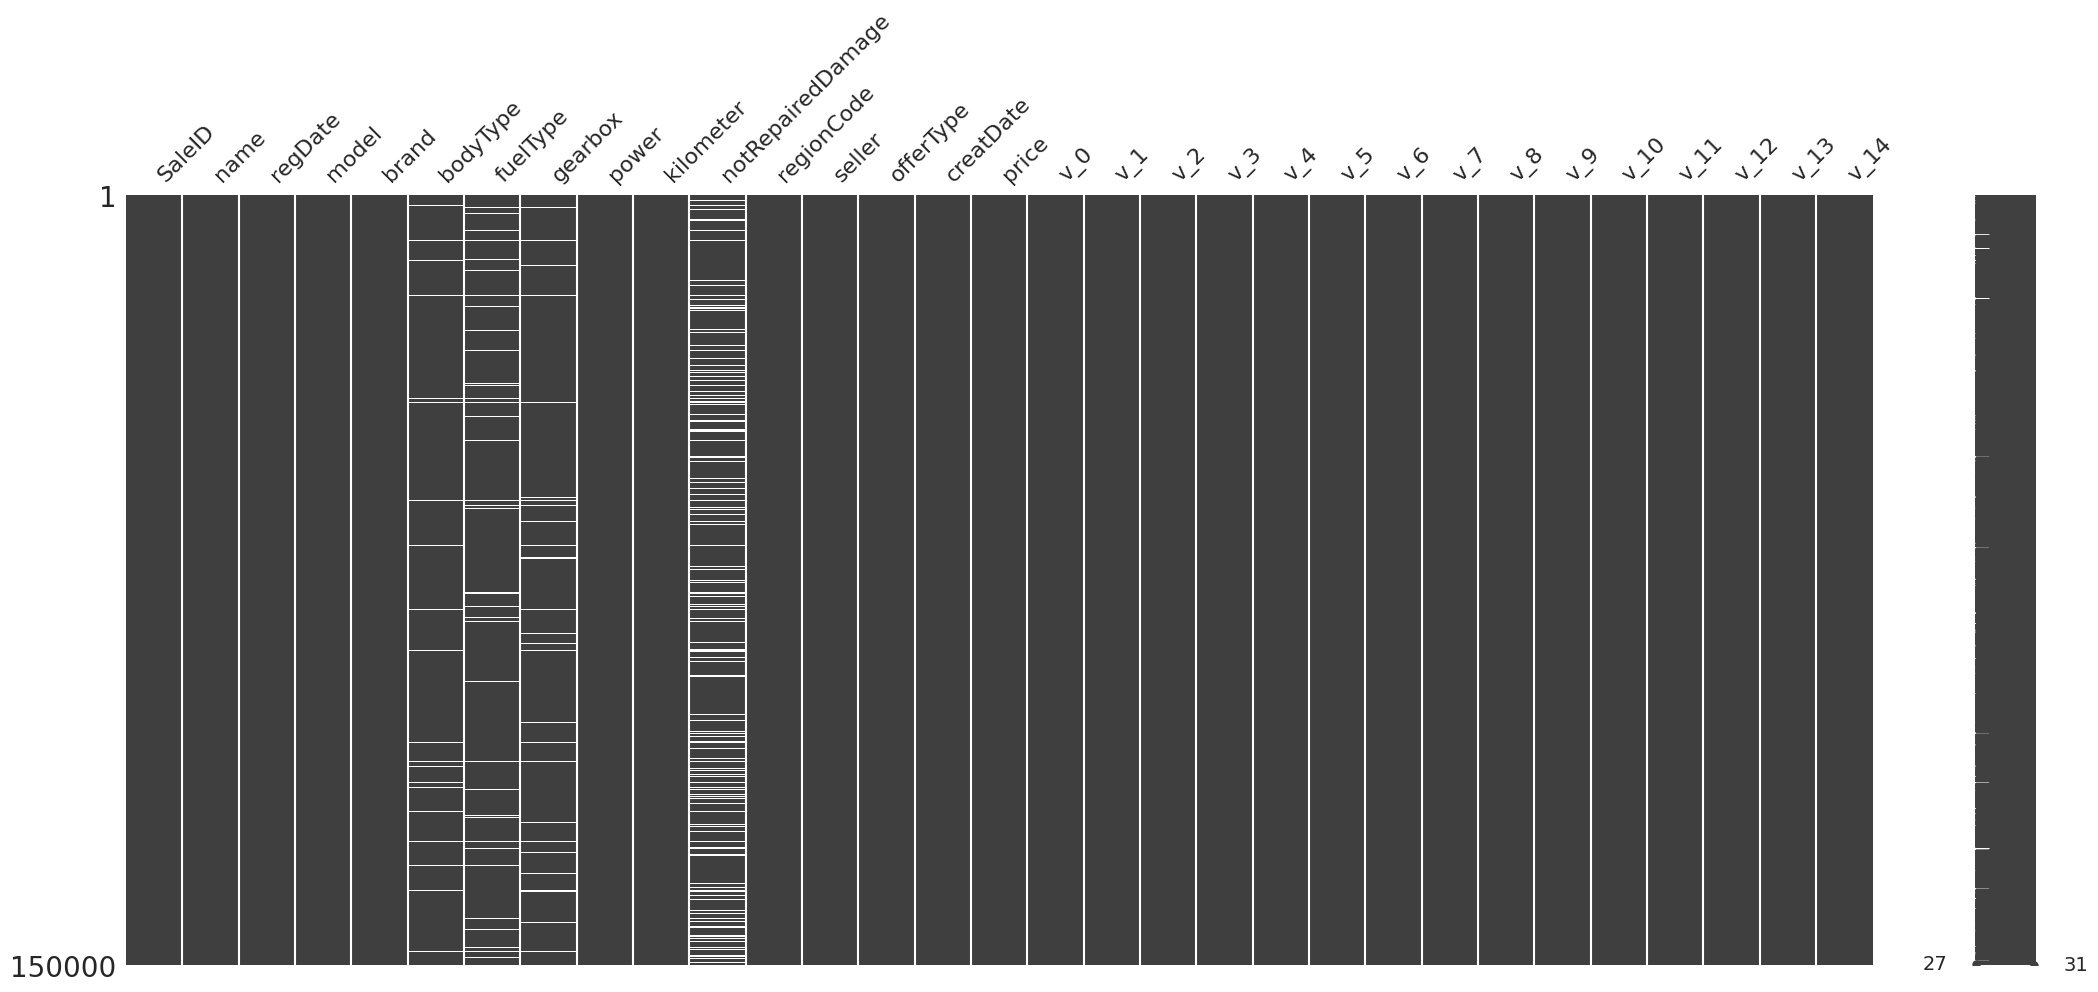

In [18]:
# 可视化缺失值

# 条形图
msno.bar(Train_data.sample(150000))

# 柱状图
sns.set_style('whitegrid')

# 计算缺失值
missing = Train_data.isnull().sum()
missing = missing[missing > 0]

# 将数据转化为长格式
f_missing = pd.DataFrame({'Features': missing.index, 'Missing Count': missing.values})

# 绘制图形
plt.figure(figsize=(8, 6))
sns.barplot(x='Features', y='Missing Count', data=f_missing)
plt.title('Number Distribution of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)

# 在每个柱状图上添加缺失值数量
for i in range(len(f_missing)):
    plt.text(i, f_missing.iloc[i]['Missing Count'], f_missing.iloc[i]['Missing Count'], ha='center', va='bottom')

# 显示
plt.show()
msno.matrix(Train_data.sample(150000))

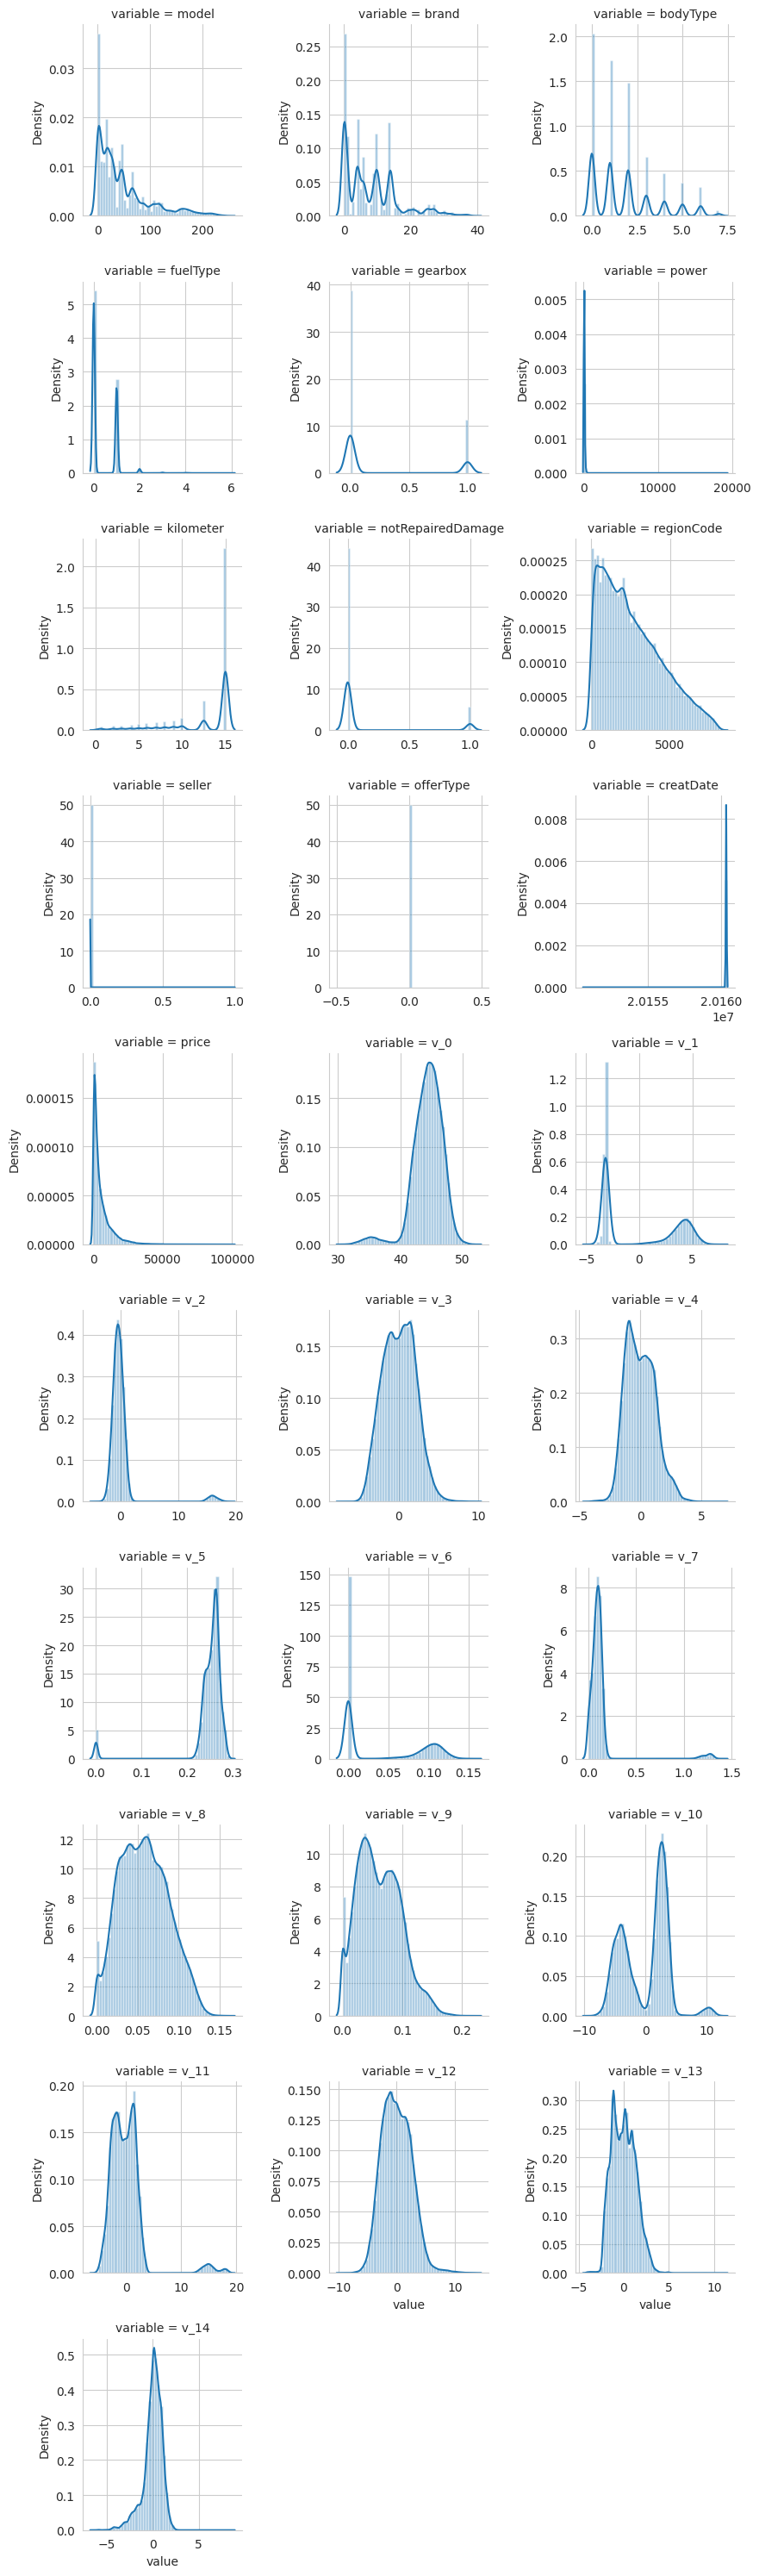

In [19]:
# 定义数字特征：（由于没有在数值类型上加以区分，因此我们需要人工挑选）
train_numeric_features= [
    'model', 'brand', 'bodyType', 'fuelType','gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode','seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14'
]
# 可视化训练集的数字特征的概率分布
sns.set_style('whitegrid')
Train_data[train_numeric_features].describe()
f_train = pd.melt(Train_data, value_vars=train_numeric_features)
g_train = sns.FacetGrid(f_train, col = 'variable', col_wrap=3, sharex=False, sharey=False)
g_train = g_train.map(sns.distplot, "value")

plt.show()

**观察分布，发现power，kilometer， power的分布不是很适合训练，需要对他们进行处理**

## 2.2观察price分布，处理长尾情况
price是我们要预测的值，会成为训练集的label。我们应该对price进行必要的观察和处理

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.1 MB/s eta 0:00:00


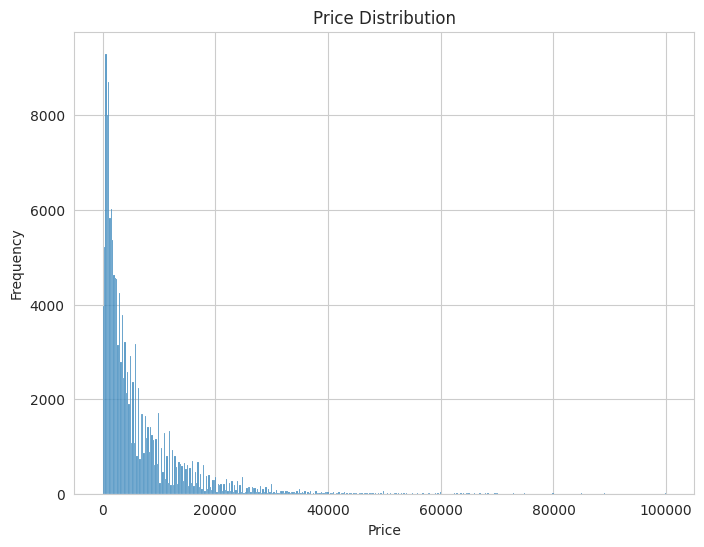

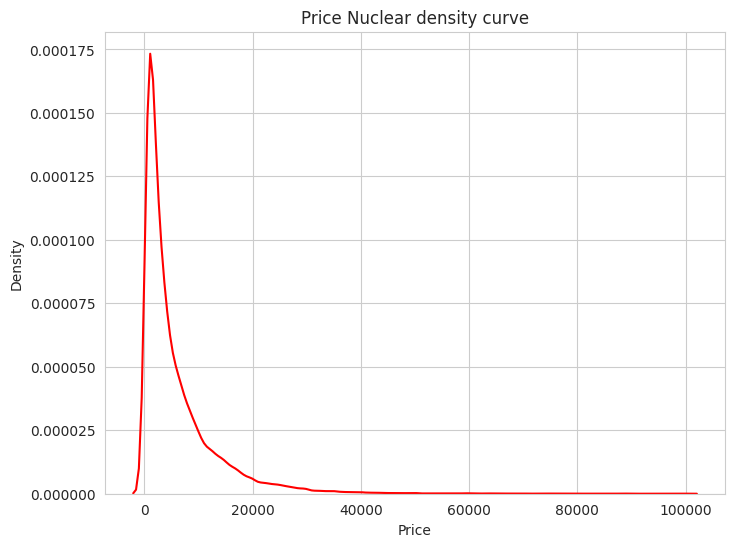

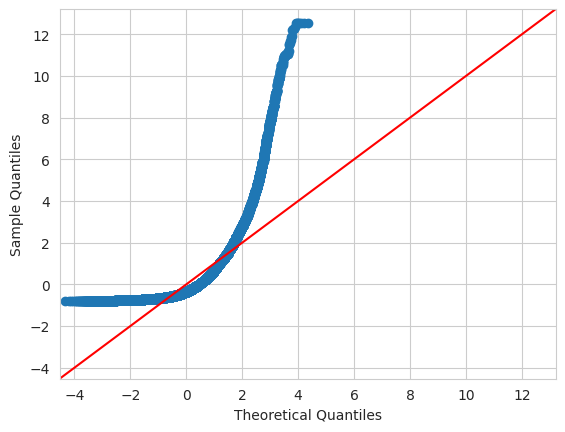

In [22]:
# 把Train_data中的price单独赋于target变量，输出概率分布
!pip install statsmodels
import statsmodels.api as sm
# 绘图
target = Train_data['price']
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 6))
sns.kdeplot(target, color='red')
plt.title('Price Nuclear density curve')
plt.xlabel('Price')
plt.ylabel('Density')

# Q-Q图
sm.qqplot(target, fit=True, line='45')

# 显示图形
plt.show()

- price在几千左右分布的非常密集，分布图像呈现长尾情况。需要进行压缩处理。
- QQ图显示的曲线和红线偏离越大，说明分布越不接近正态分布

In [23]:
# log压缩price属性

Train_data['price'] = np.log(Train_data['price'])

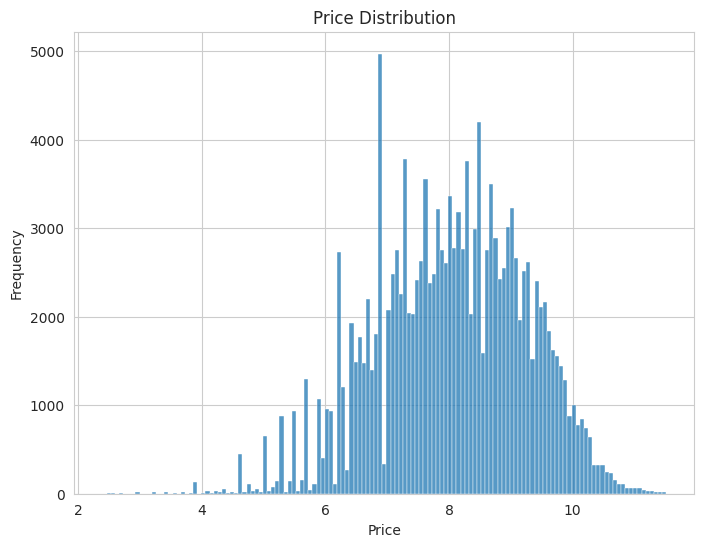

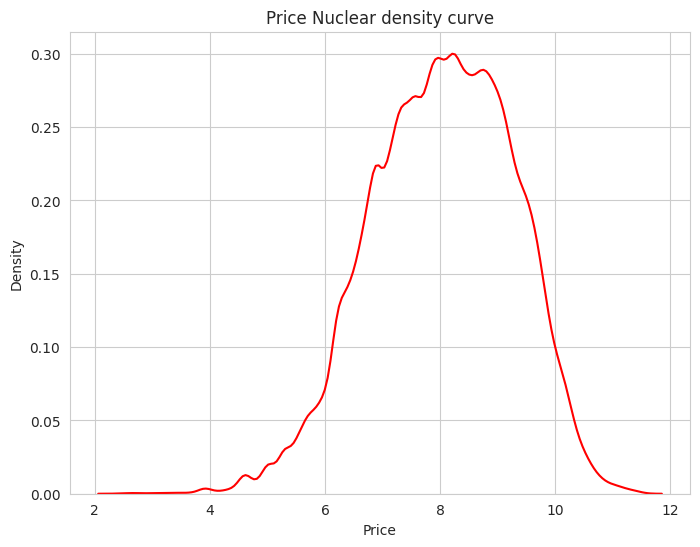

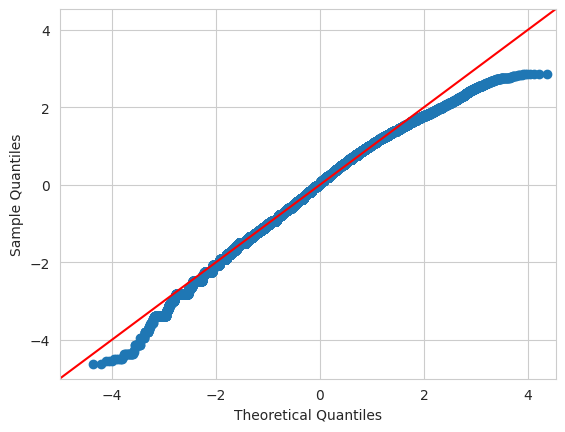

In [24]:
# 可视化处理后的price分布
target = Train_data['price']
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 6))
sns.kdeplot(target, color='red')
plt.title('Price Nuclear density curve')
plt.xlabel('Price')
plt.ylabel('Density')

# Q-Q图
sm.qqplot(target, fit=True, line='45')
# 显示图形
plt.show()

- 简单的log压缩得到的结果也不错
- QQ图更是可见一斑

## 2.3处理严重倾斜数据
seller和offerType的数据是严重倾斜，不是0就是1.对结果预测很不利，建议删除

In [25]:
## 查看seller、offerType取值
print("训练集的特征seller数据分布：")
print(Train_data['seller'].value_counts())

print("\n训练集的特征offerType数据分布：")
print(Train_data['offerType'].value_counts())

print("\n测试集的特征seller数据分布：")
print(Test_data['seller'].value_counts())

print("\n测试集的特征offerType数据分布：")
print(Test_data['offerType'].value_counts())

训练集的特征seller数据分布：
0    149999
1         1
Name: seller, dtype: int64

训练集的特征offerType数据分布：
0    150000
Name: offerType, dtype: int64

测试集的特征seller数据分布：
0    50000
Name: seller, dtype: int64

测试集的特征offerType数据分布：
0    50000
Name: offerType, dtype: int64


In [26]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

**合并训练集和测试集，方便统一处理特征**

In [27]:
# 标记数据来源，train = 1代表该数据来自训练集， train = 0代表该数据来自测试集，方便数据处理结束后拆分数据集
Train_data['train'] = 1
Test_data['train'] = 0

# 合并为df
df = pd.concat([Train_data, Test_data], ignore_index=True)

# Step3.特征工程

## 3.1构造使用时间
- 使用时间可以根据二手车的销售时间减去车辆的注册时间得到。
- 使用时间很大程度上影响二手物品的价格

**所以构造使用时间这个新的特征**

In [28]:
# make it
df['used_time'] = (pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')).dt.days
#计算 df DataFrame 中的 creatDate 列和 regDate 列之间的时间差，并将结果存储在一个名为 used_time 的新列中

## 3.2构造出售城市
- regionCode大概率为城市邮编信息，从中提取出车辆的出售地
- 二手车的交易地址也会影响价格，这和地区的经济状况有关

**所以构造出售时间这个新的特征**

In [29]:
df['city'] = df['regionCode'].apply(lambda x : str(x)[:-3])
#删除 regionCode 中的后三位编码，留下前面1位，因为只留1位方便分类，类别最多就10种。如果留2位，不同类别最多有100个

#重传
df = df

## 3.3统计不同品牌的销售量
- 常识：不同品牌的车的售价区间是不同的，如豪车的二手价格区间大概率比普通车高
- 销售量越高的品牌，是否代表其在二手车市场更受欢迎？好卖与否会影响售价

**所以对不同品牌的车分类，统计每个品牌的销售量特征**

In [30]:
# 按照brand分类
Train_gb = Train_data.groupby('brand')

#定义
car_info = {}

#统计
for brand_name, brand_data in Train_gb:
    info = {}
    brand_data = brand_data[brand_data['price'] > 0] #price大于0的正常值
    info['This_brand_amount'] = len(brand_data)
    info['This_brand_price_max'] = brand_data.price.max()
    info['This_brand_price_median'] = brand_data.price.median()
    info['This_brand_price_min'] = brand_data.price.min()
    info['This_brand_price_sum'] = brand_data.price.sum()
    info['This_brand_price_std'] = brand_data.price.std()
    info['This_brand_price_average'] = round(brand_data.price.sum() / (len(brand_data) + 1), 2)
    car_info[brand_name] = info

#左拼接到df中
brand_feature = pd.DataFrame(car_info).T.reset_index().rename(columns={"index": "brand"})
df = df.merge(brand_feature, how='left', on='brand')

## 3.4power和kilometer特征处理
- 题目规定power取值为[0， 600]。我们要处理大于600的power数据
- power数据是否是不利于预测的分布，我们有必要查看并处理
- 对kilometer特征同理

<AxesSubplot:xlabel='power', ylabel='Density'>

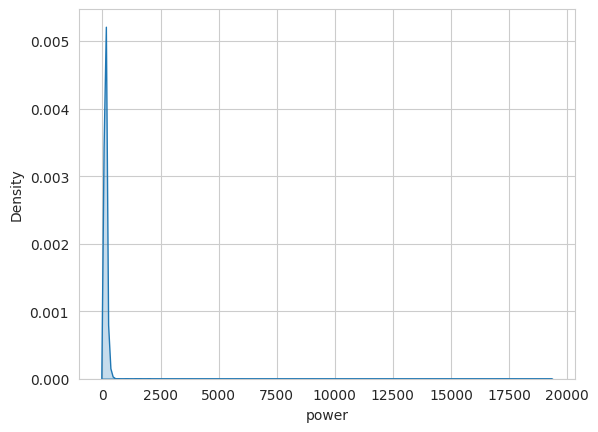

In [31]:
# 查看power特征分布
# 可视化处理后的price分布
sns.kdeplot(df['power'], shade=True)


**可以看到曲线画到了20000，是不是存在个别非常大的取值？**

In [32]:
# 查看是否有大于600或小于0的异常值
num = 0
zero_num = 0
for x in df['power']:
    if x == 0:
        zero_num = zero_num+1
    if x > 600 :
        num = num+1
print("有{}个数据大于600".format(num))
print("有{}个数据取值为0".format(zero_num))


有194个数据大于600
有17219个数据取值为0


<AxesSubplot:xlabel='power', ylabel='Density'>

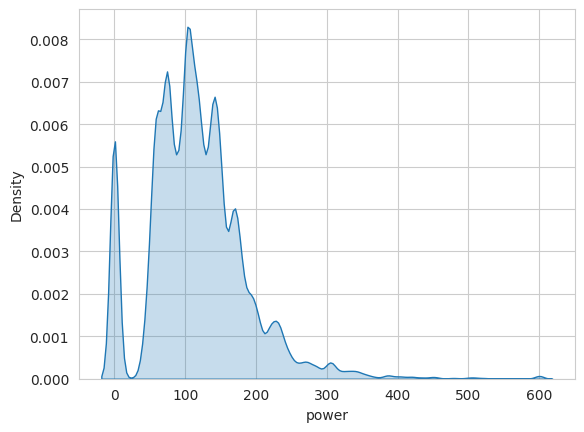

In [33]:
# 把大于600的取值替换为600
df['power'] = df['power'].map(lambda x: 600 if x > 600 else x)

#再次查看
if any(df['power'] > 600):
    print("错误：power列中存在大于600的值")

#查看处理后的power分布
sns.kdeplot(df['power'], shade=True)

In [34]:
# 数据分桶
bin = [i*10 for i in range(31)]
df['power_bin'] = pd.cut(df['power'], bin, labels=False)
df[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [35]:
#删除无用特征
df = df.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

<AxesSubplot:xlabel='power', ylabel='Density'>

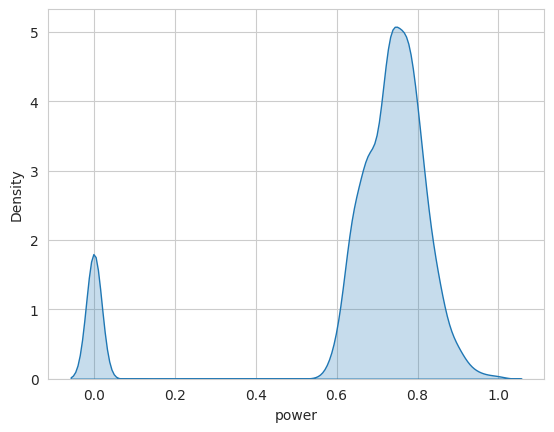

In [36]:
# 对power 的log压缩+归一化
#from sklearn import preprocessing
#MinMaxScaler = preprocessing.MinMaxScaler()
df['power'] = np.log(df['power'] + 1) #为了防止对0取log出现缺失值。
df['power'] = ((df['power'] - np.min(df['power'])) / (np.max(df['power']) - np.min(df['power'])))
sns.kdeplot(df['power'], shade=True)

<AxesSubplot:xlabel='kilometer', ylabel='Density'>

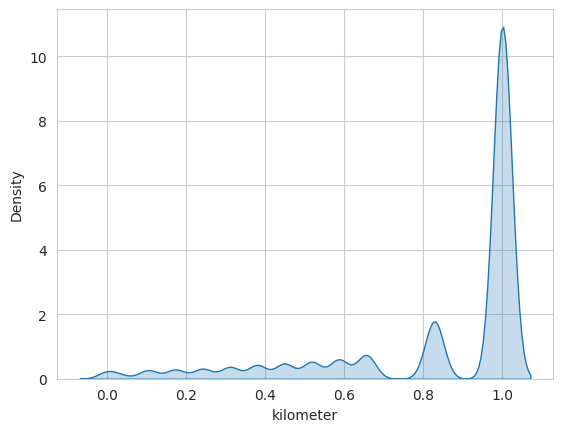

In [37]:
# 对kilometer的归一化
df['kilometer'] = ((df['kilometer'] - np.min(df['kilometer'])) / 
                        (np.max(df['kilometer']) - np.min(df['kilometer'])))

sns.kdeplot(df['kilometer'], shade=True)


In [38]:
# brand归一化
cols_to_normalize = ['This_brand_amount', 'This_brand_price_average', 'This_brand_price_max', 
                     'This_brand_price_median', 'This_brand_price_min', 'This_brand_price_std', 
                     'This_brand_price_sum']

for col in cols_to_normalize:
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))

## 3.5特征标准化
- 将数值型特征进行标准化处理，使得每个特征的均值为 0，方差为 1。标准化可以使得不同特征之间的数值范围相同，有利于优化算法的收敛以及提高模型的性能。
- 离散特征进行独热编码，将每个离散特征的每个取值都转换成一个新的二元特征。可以将离散特征转换成模型更容易处理的连续特征。

In [39]:
# 数字特征的标准化

numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14','used_time']
# 我们将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in numeric_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [40]:
# 离散特征独热编码
df = pd.get_dummies(df, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin', 'city'])


# Step4.模型建立和训练

## 3.5准备训练集和测试集

In [41]:
#导入包

import torch
import torch.nn as nn
#from torch.autograd import Variable
from sklearn.ensemble import RandomForestRegressor
import torch.optim as optim

In [42]:
#通用减低内存占用函数。
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

df = reduce_mem_usage(df)

Mem. usage decreased to 145.15 Mb (-29.9% reduction)


In [43]:
#缺失值替换为-1
df = df.fillna(-1)

#拆分数据集
X_train = df[df['train'] == 1]
X_test = df[df['train'] != 1]

In [44]:
# 提取label
X_train_label = X_train.pop('price')

# 删掉数据集的标签和来源
del X_test['price']
del X_train['train']
del X_test['train']

# 剔除不必要的列
X_train_SaleID = X_train.pop('SaleID')
X_train_name = X_train.pop('name')
X_test_SaleID = X_test.pop('SaleID')
X_test_name = X_test.pop('name')

print(X_train.shape)
print(X_test.shape)


(150000, 371)
(50000, 371)


Epoch [10/1000], Loss: 65.1915
Epoch [20/1000], Loss: 63.1149
Epoch [30/1000], Loss: 61.5047
Epoch [40/1000], Loss: 60.0750
Epoch [50/1000], Loss: 58.6518
Epoch [60/1000], Loss: 57.2099
Epoch [70/1000], Loss: 55.7668
Epoch [80/1000], Loss: 54.3092
Epoch [90/1000], Loss: 52.8492
Epoch [100/1000], Loss: 51.4013
Epoch [110/1000], Loss: 49.9600
Epoch [120/1000], Loss: 48.5002
Epoch [130/1000], Loss: 47.0199
Epoch [140/1000], Loss: 45.4936
Epoch [150/1000], Loss: 43.9079
Epoch [160/1000], Loss: 42.2636
Epoch [170/1000], Loss: 40.5927
Epoch [180/1000], Loss: 38.9113
Epoch [190/1000], Loss: 37.2221
Epoch [200/1000], Loss: 35.4995
Epoch [210/1000], Loss: 33.7483
Epoch [220/1000], Loss: 31.9945
Epoch [230/1000], Loss: 30.2596
Epoch [240/1000], Loss: 28.5516
Epoch [250/1000], Loss: 26.8657
Epoch [260/1000], Loss: 25.2113
Epoch [270/1000], Loss: 23.5439
Epoch [280/1000], Loss: 21.9201
Epoch [290/1000], Loss: 20.3531
Epoch [300/1000], Loss: 18.8510
Epoch [310/1000], Loss: 17.3949
Epoch [320/1000],

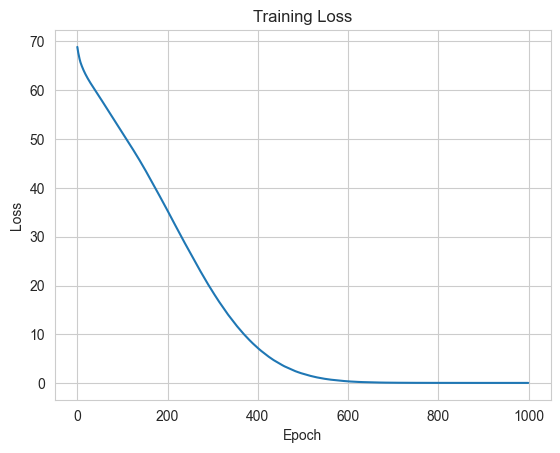

In [34]:
# 最初的模型

# 搭建模型
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4,output_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.relu1 = nn.LeakyReLU(0.01)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.bn3 = nn.BatchNorm1d(hidden_dim3)
        self.relu3 = nn.LeakyReLU(0.01)
        self.fc4 = nn.Linear(hidden_dim3,hidden_dim4)
        self.bn4 = nn.BatchNorm1d(hidden_dim4)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim4, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu3(out) 
        out = self.fc4(out)
        out = self.bn4(out)
        out = self.relu4(out)
        out =self.fc5(out)
        return out
    
# 超参数设定
input_dim = X_train.shape[1]
hidden_dim1 = 100
hidden_dim2 = 50
hidden_dim3 = 25
hidden_dim4 = 15
output_dim = 1
learning_rate = 0.001
num_epochs = 1000


# 初始化模型
model = MyModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3,hidden_dim4, output_dim)


# 定义损失函数和优化器
criterion = nn.MSELoss()  # 损失函数是MSELoos，可以换成L1loos，使用：nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# 转化为numpy数组,再转化为torch张量
x_train = torch.tensor(X_train.values, dtype = torch.float32)  # 训练集转化为张量
y_train = torch.tensor(X_train_label.values.reshape(-1, 1), dtype = torch.float32)  # 标签转化为张量

train_losses = []

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 输出结果
    if(epoch +1)%10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


# 可视化训练过程中的loss值
plt.plot(range(num_epochs), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [36]:
# 测试模型

x_test = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = pd.DataFrame(np.exp(model(x_test).detach().numpy()))

y_test_id = pd.read_csv('./used_car_sample_submit.csv')
result = pd.concat([y_test_id['SaleID'],y_pred], axis=1)
result.columns = ['SaleID','price']
result.to_csv('./resultnew2.csv', index=False)
